In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = 'Resources/myopia.csv'
df = pd.read_csv(file_path)
df.head()

AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0    6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1    6  0.608  22.379999  3.702  3.392  15.29        4       0       1   
2    6  1.179  22.490000  3.462  3.514  15.52       14       0       2   
3    6  0.525  22.200001  3.862  3.612  14.73       18      11       0   
4    5  0.697  23.290001  3.676  3.454  16.16       14       0       0   

   STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  MYOPIC  
0        0    10         34      1      1       1  
1        1     7         12      1      1       0  
2        0    10         14      0      0       0  
3        0     4         37      0      1       1  
4        0     4          4      1      0       0

In [4]:
X = df.drop('MYOPIC', axis=1)
y = df['MYOPIC']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: MYOPIC, dtype: int64

# Dimensionality Reduction

In [5]:
#scale X
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)

In [6]:
#reduce dimension with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

X_scaled_pca = pca.fit_transform(X_scaled)

In [7]:
# further dataset reduction wtih t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(X_scaled_pca)

C:\Users\JoeyE\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [8]:
#create tsne dataframe to plot
df2 = pd.DataFrame()

df2['x'] = tsne_features[:,0]
df2['y'] = tsne_features[:,1]

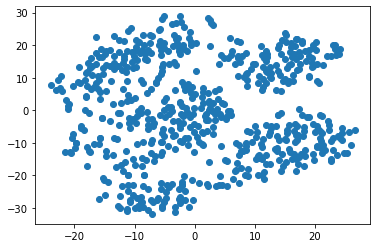

In [9]:
#creating t-sne plot
plt.scatter(df2['x'], df2['y'])
plt.show()

It's difficult to visually observe distinct clusters.

# Cluster Analysis with K-means

In [10]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled_pca)
    inertia.append(km.inertia_)

In [11]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

k      inertia
0  1  7948.905345
1  2  6794.415695
2  3  6031.097742
3  4  5662.587617
4  5  5376.410589

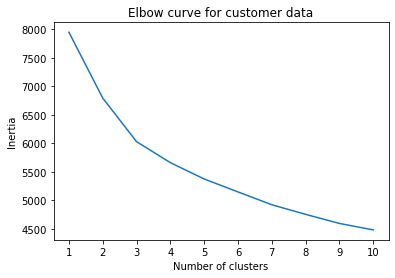

In [12]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [13]:
 def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

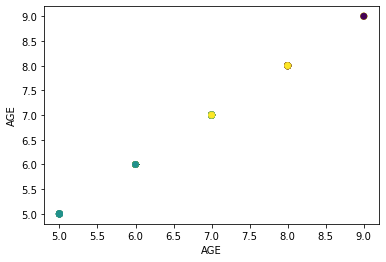

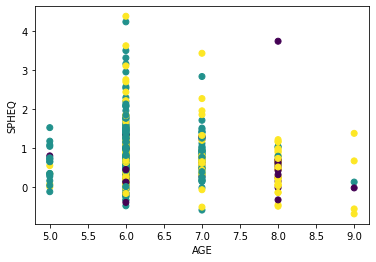

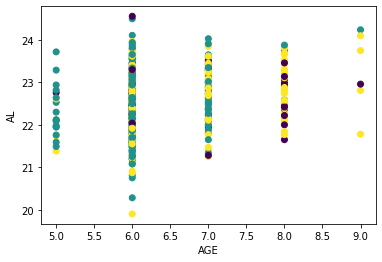

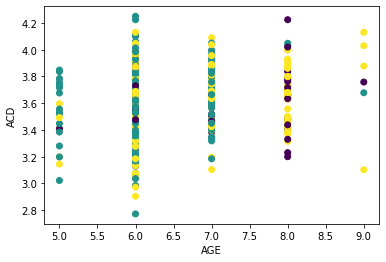

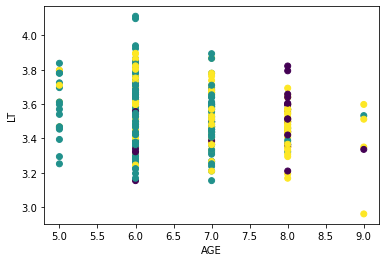

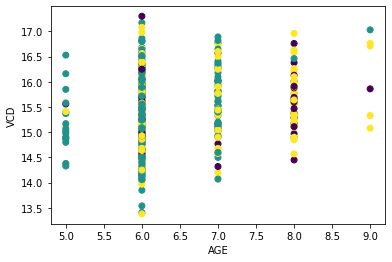

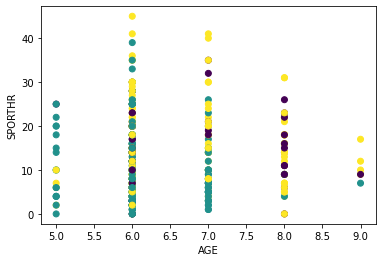

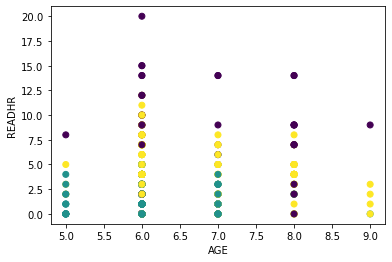

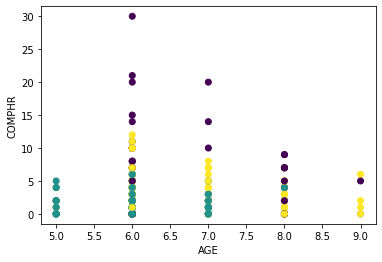

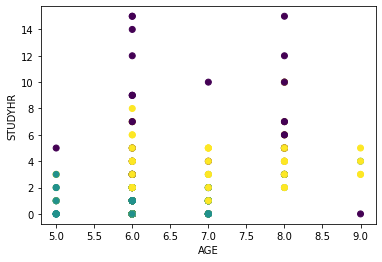

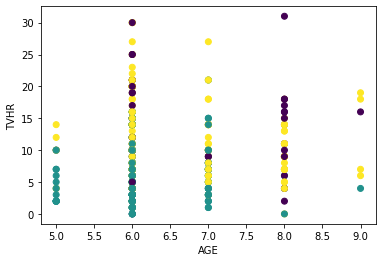

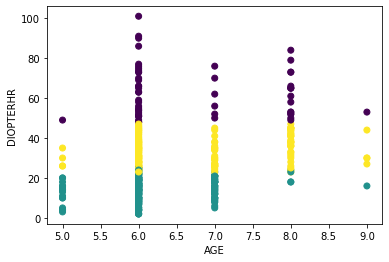

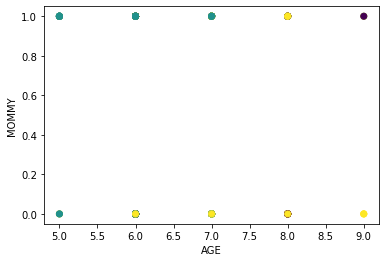

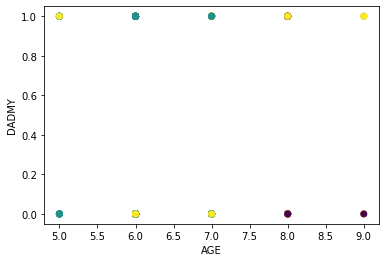

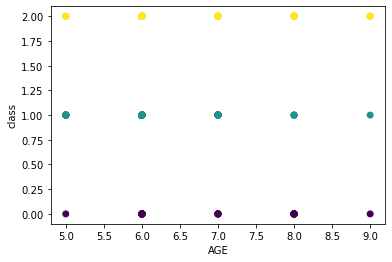

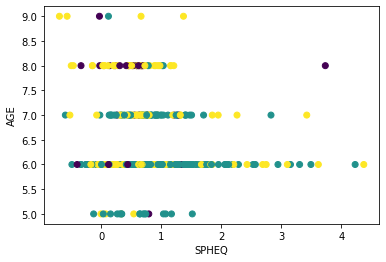

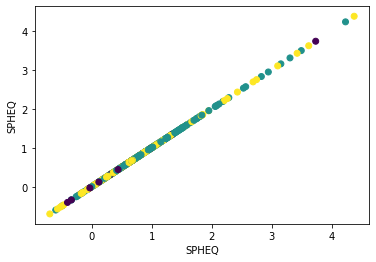

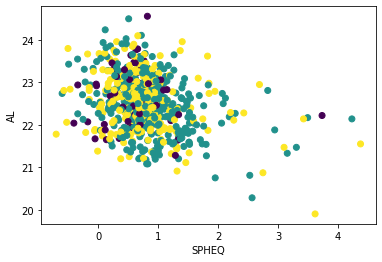

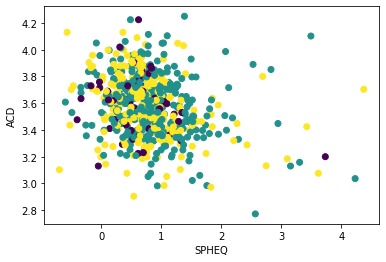

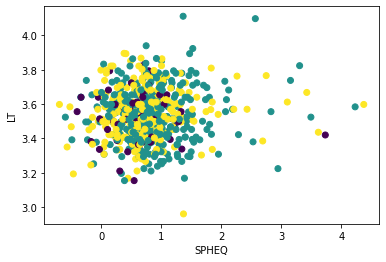

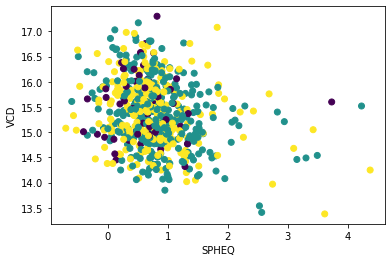

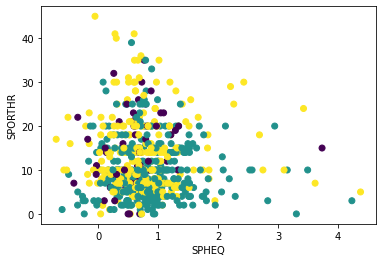

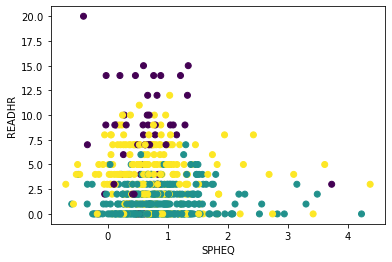

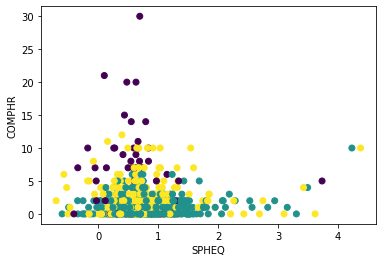

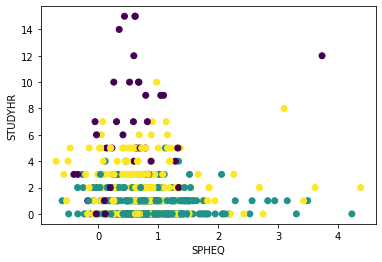

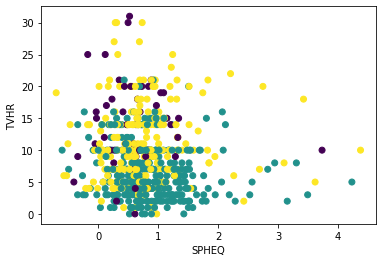

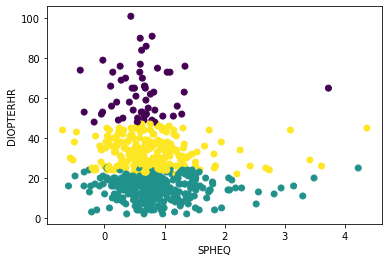

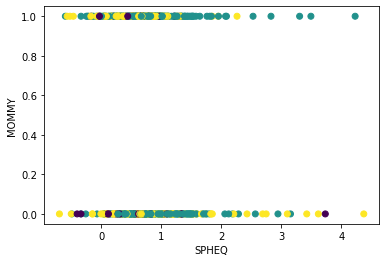

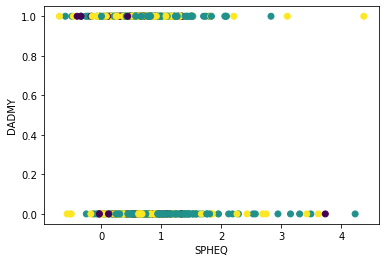

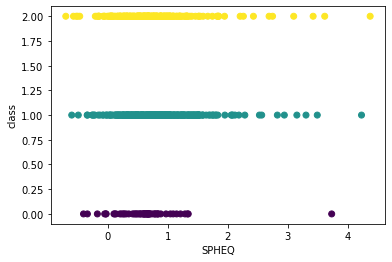

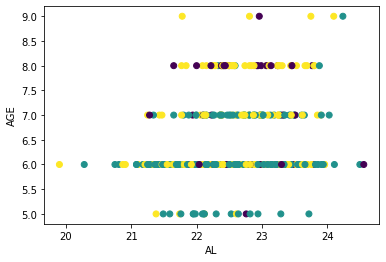

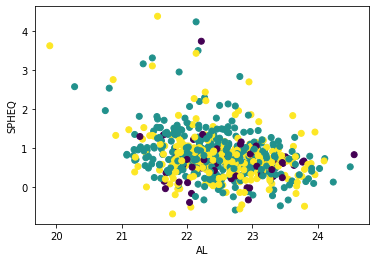

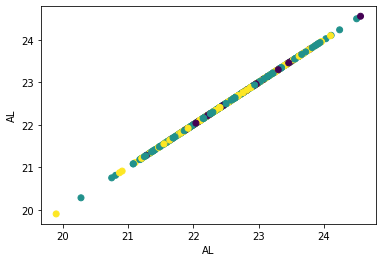

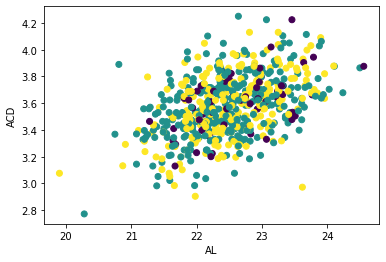

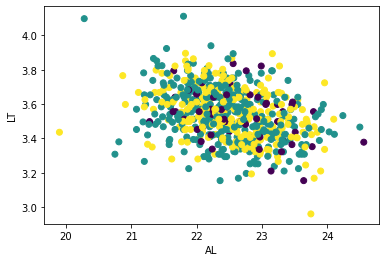

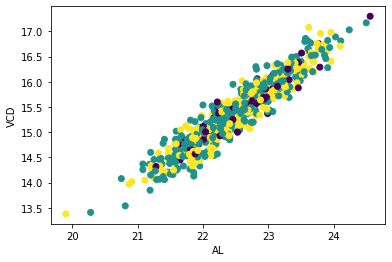

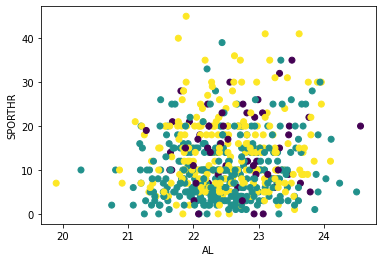

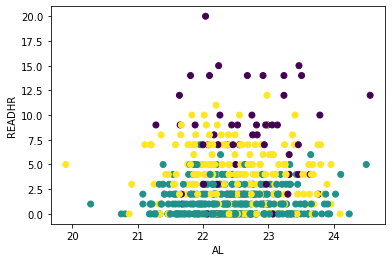

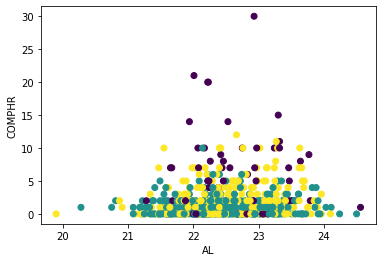

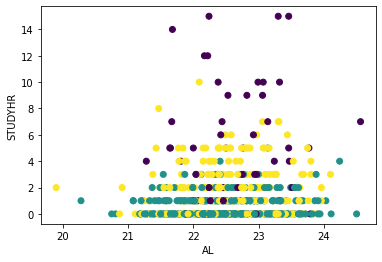

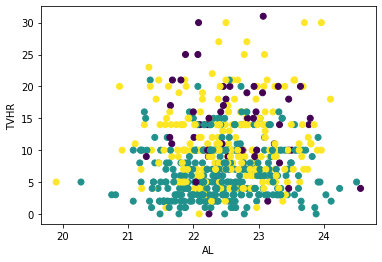

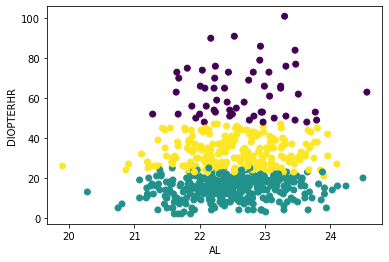

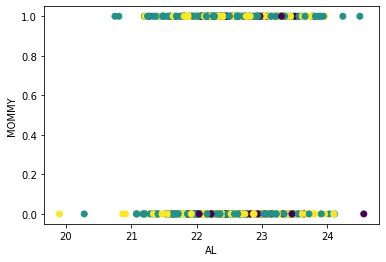

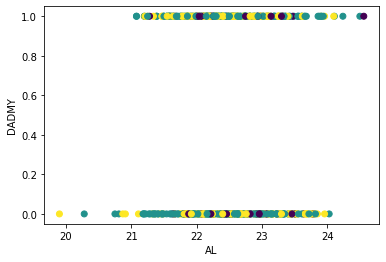

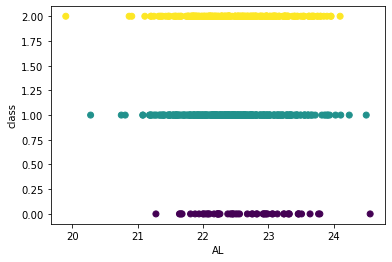

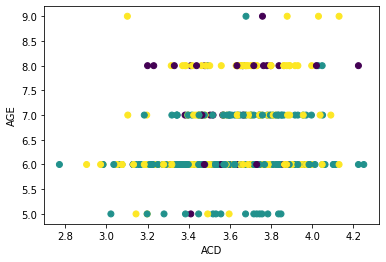

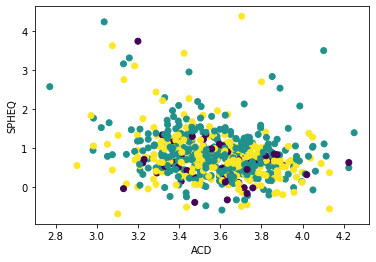

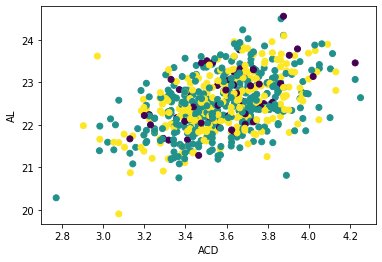

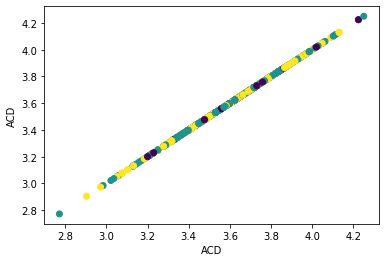

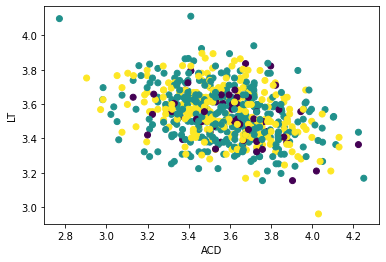

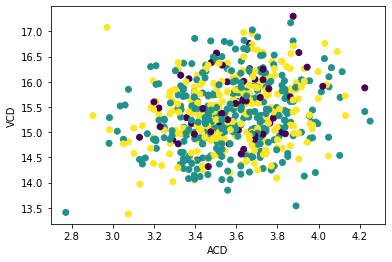

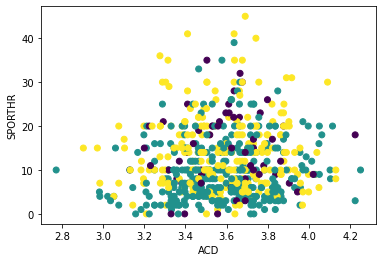

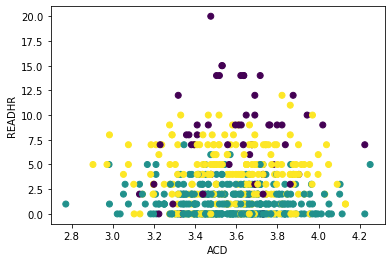

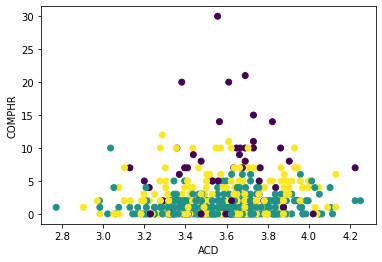

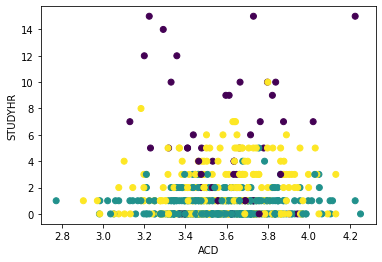

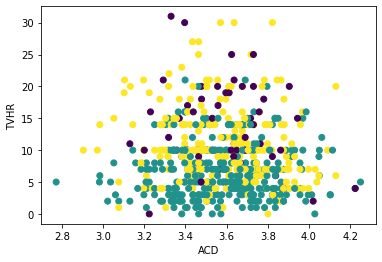

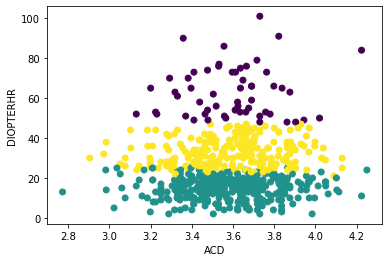

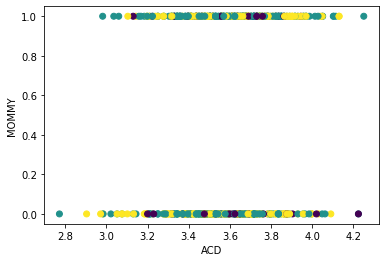

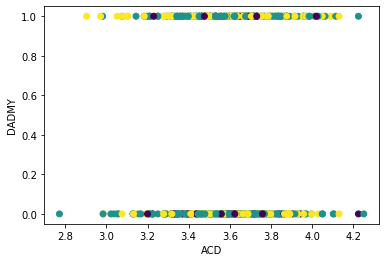

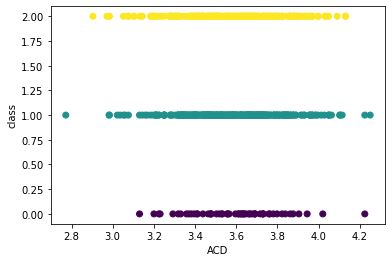

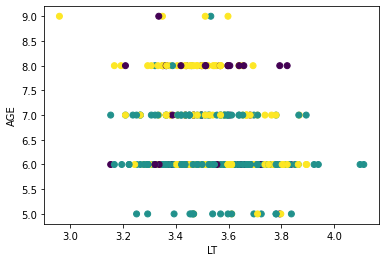

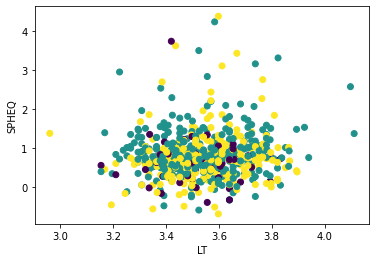

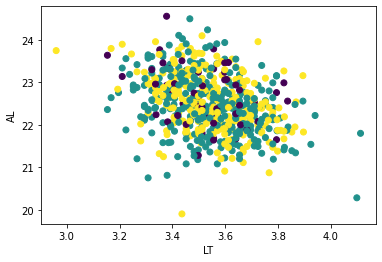

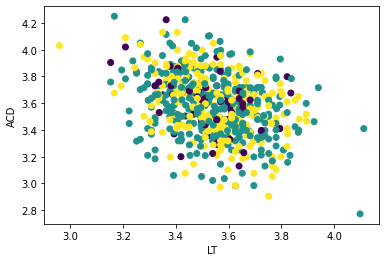

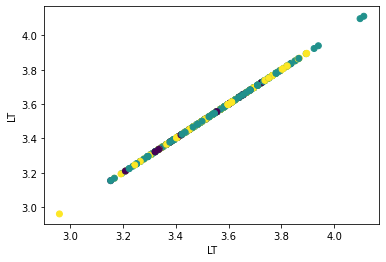

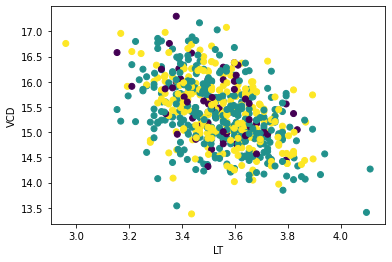

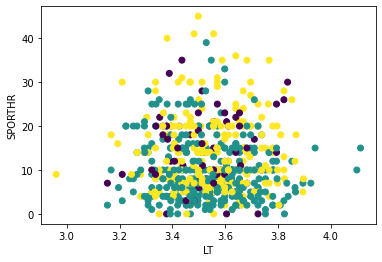

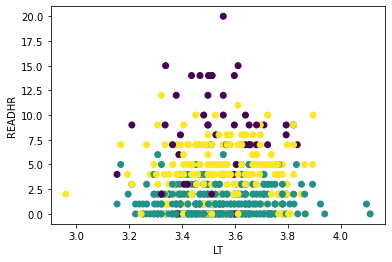

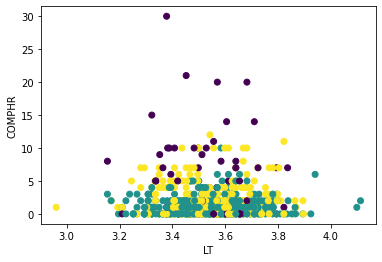

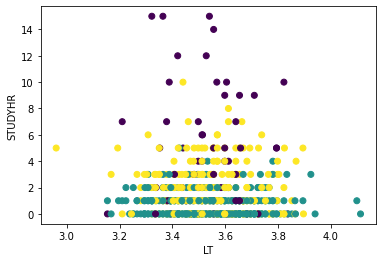

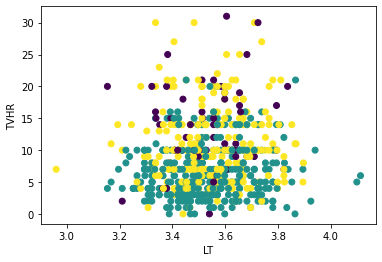

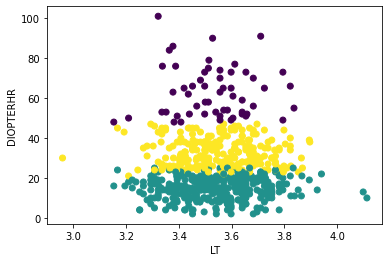

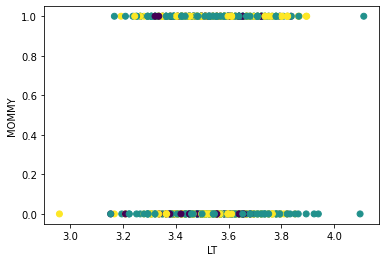

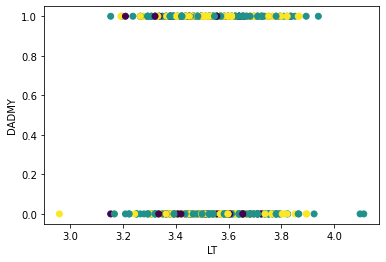

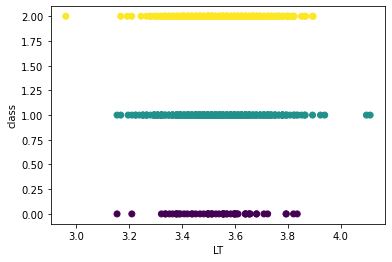

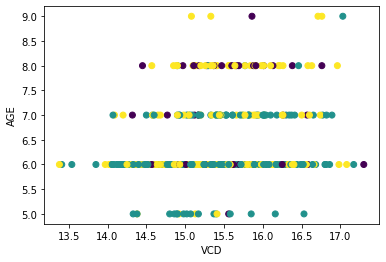

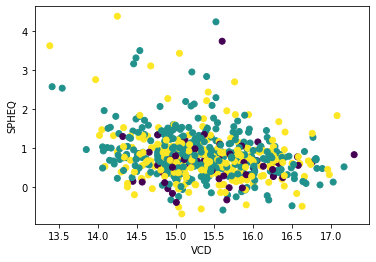

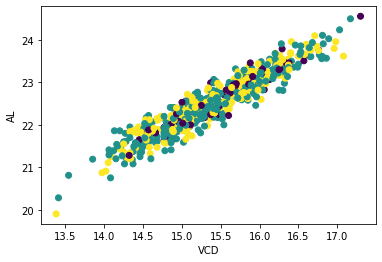

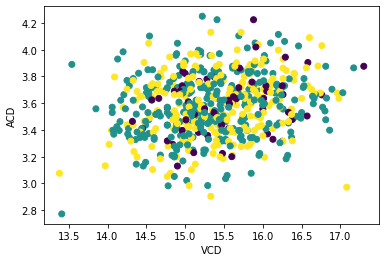

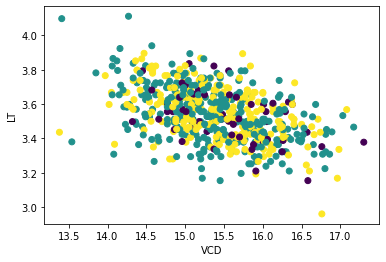

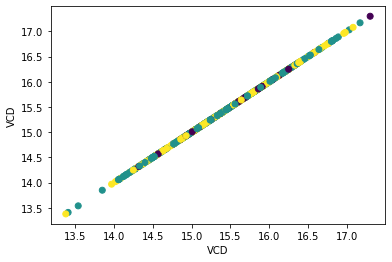

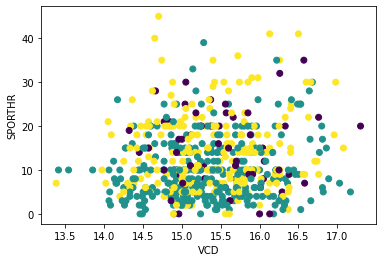

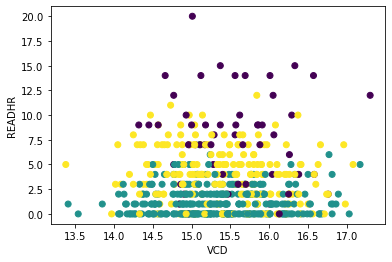

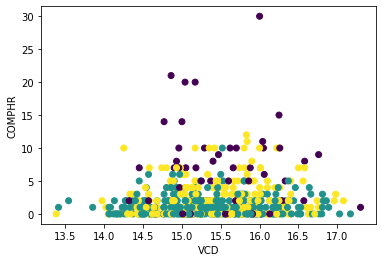

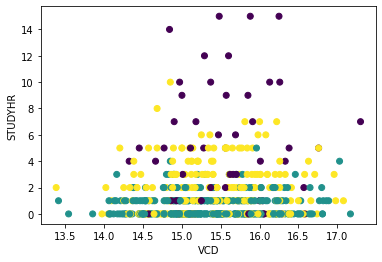

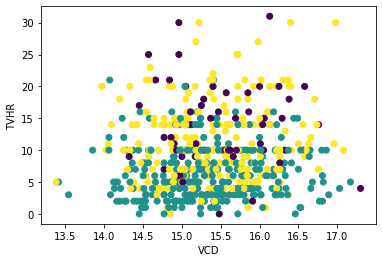

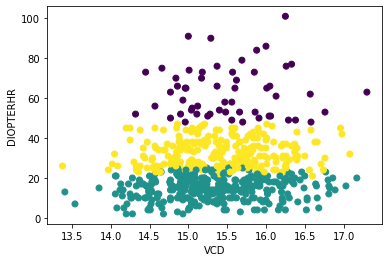

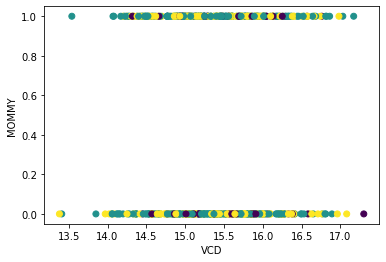

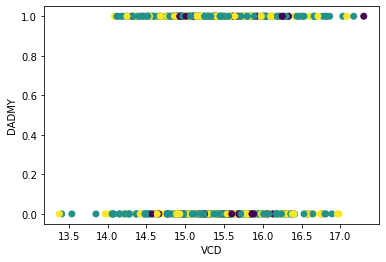

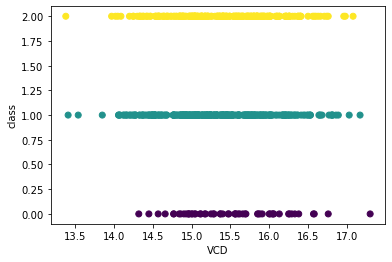

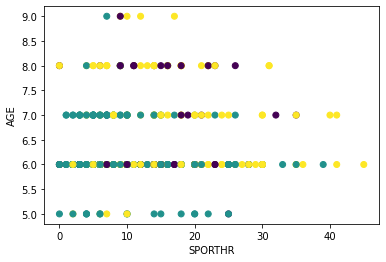

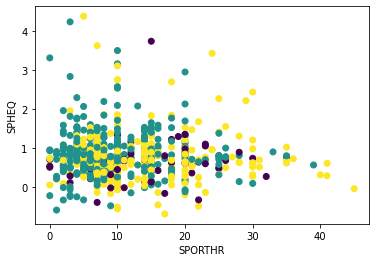

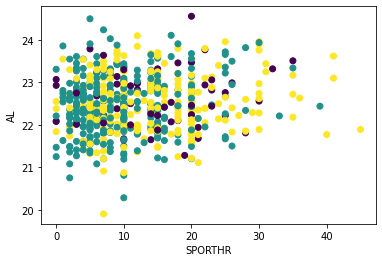

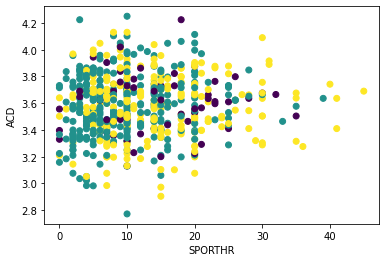

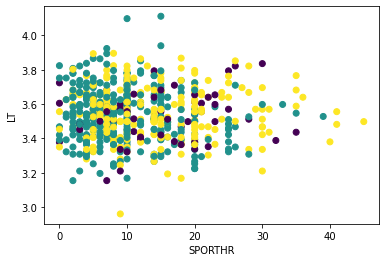

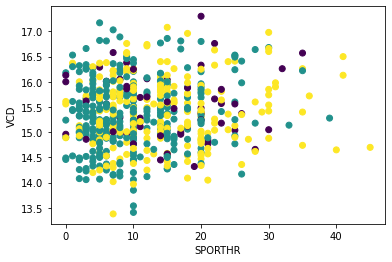

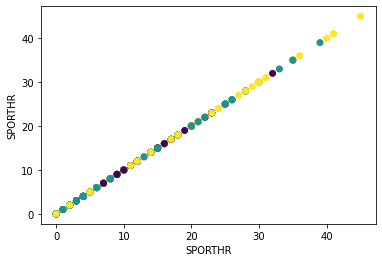

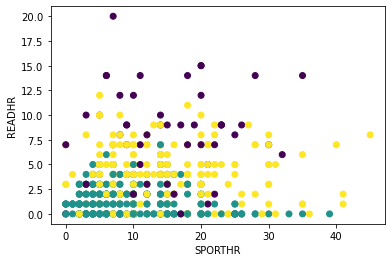

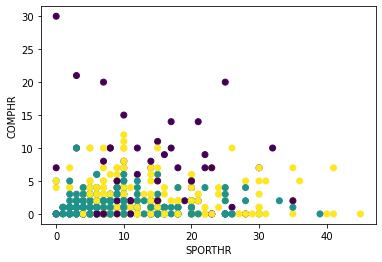

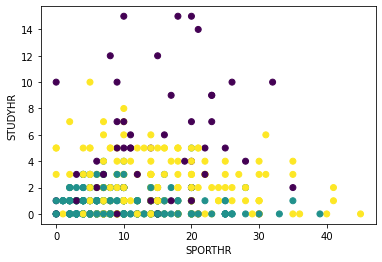

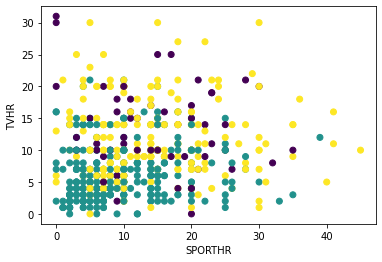

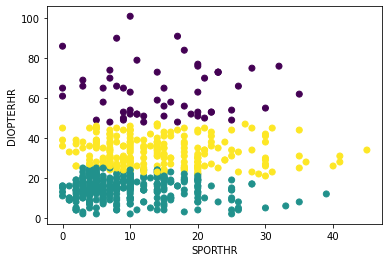

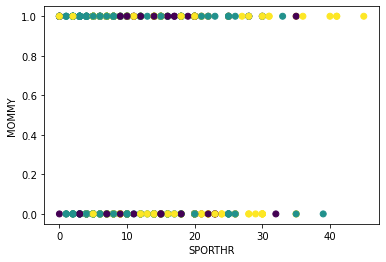

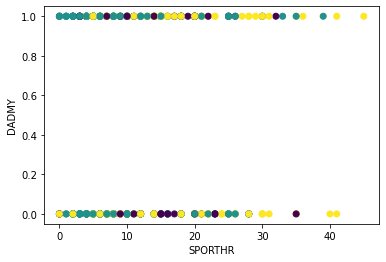

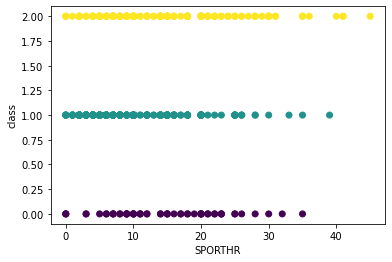

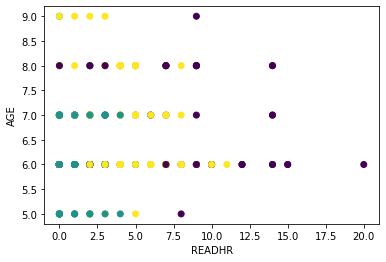

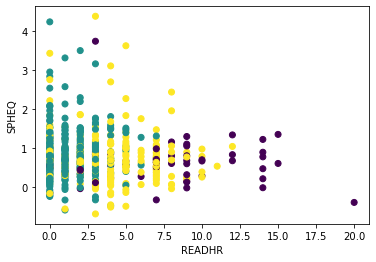

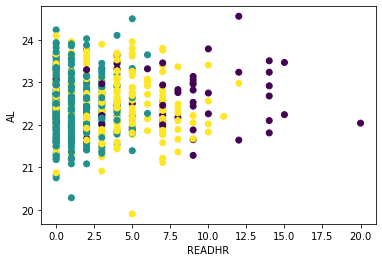

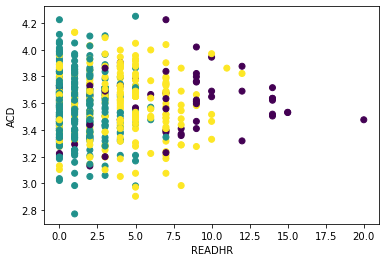

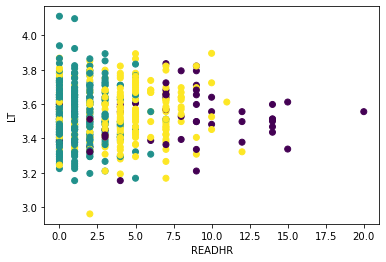

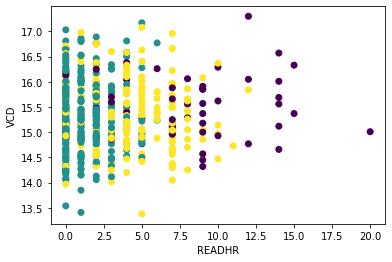

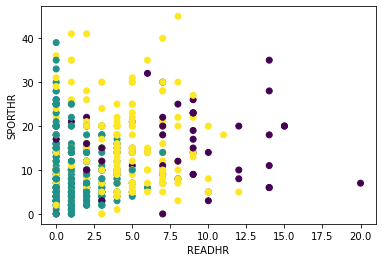

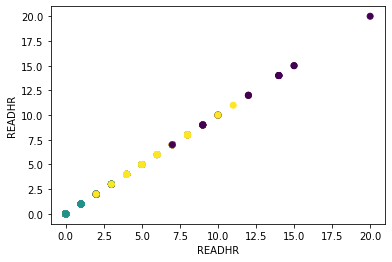

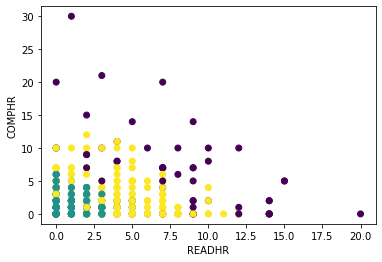

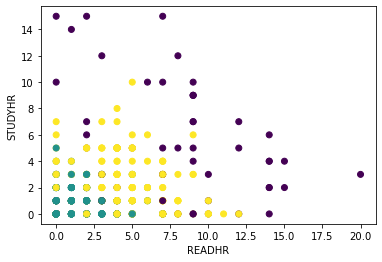

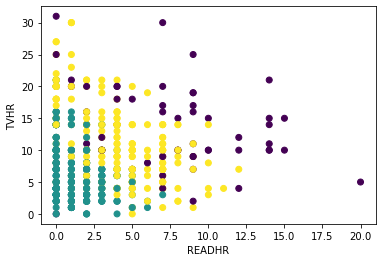

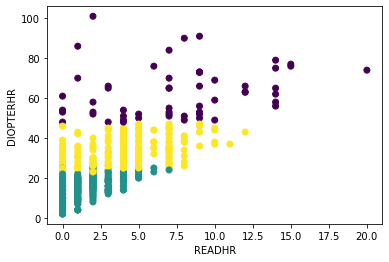

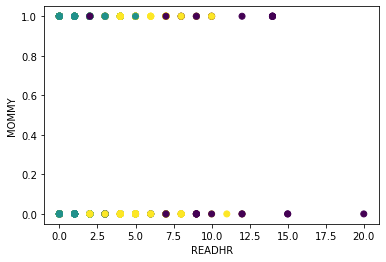

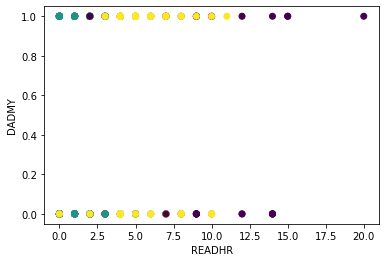

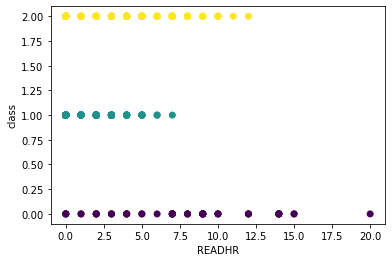

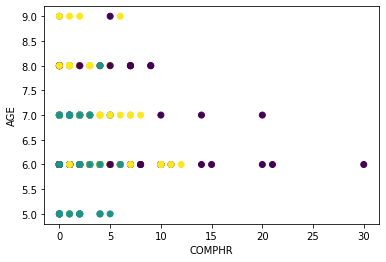

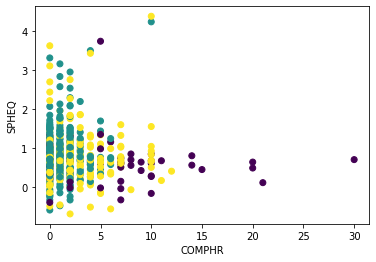

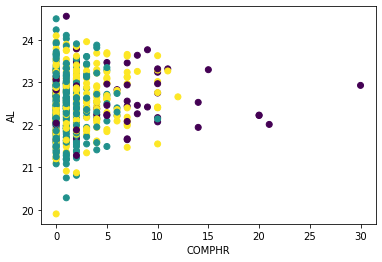

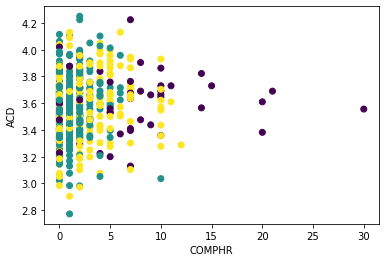

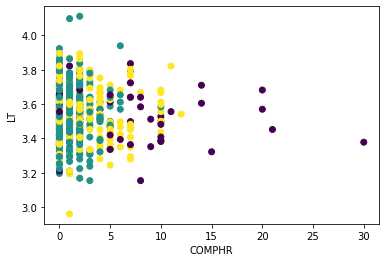

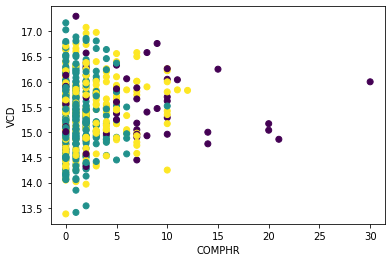

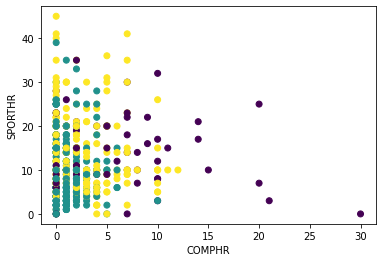

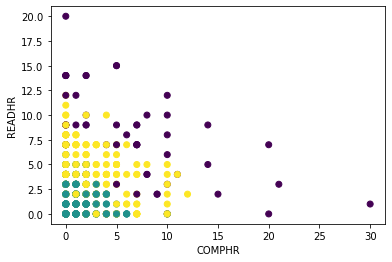

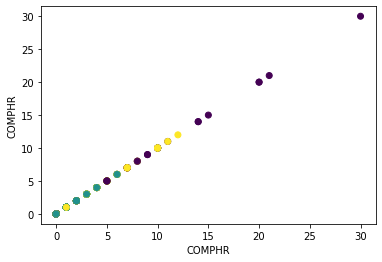

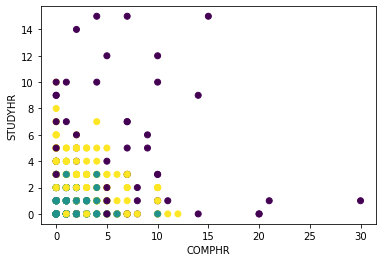

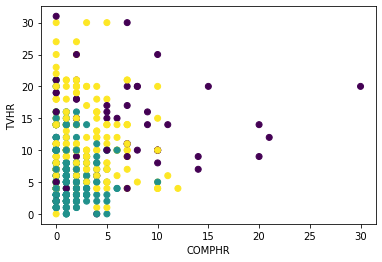

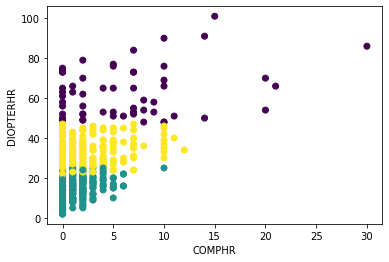

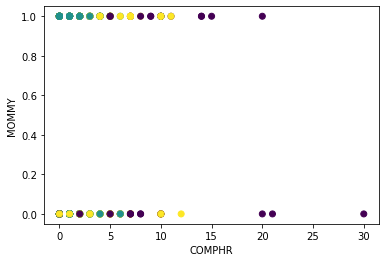

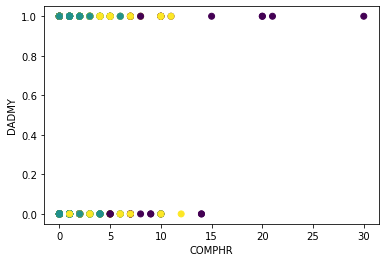

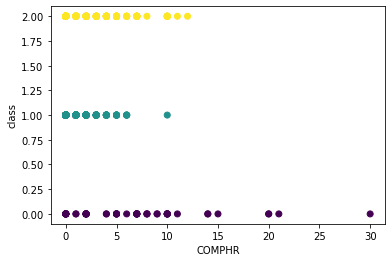

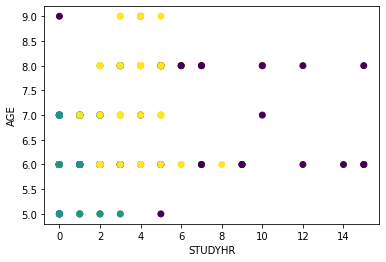

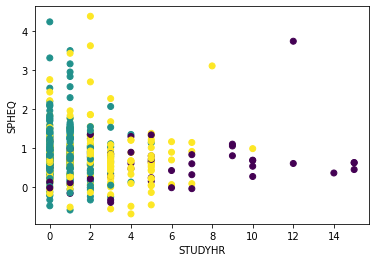

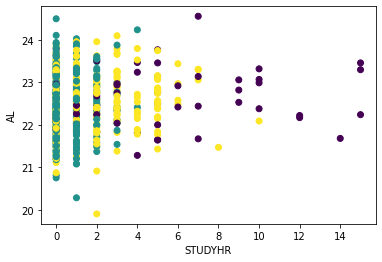

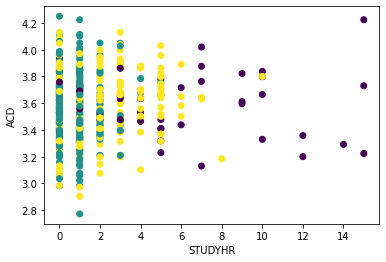

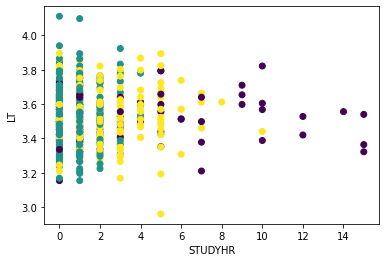

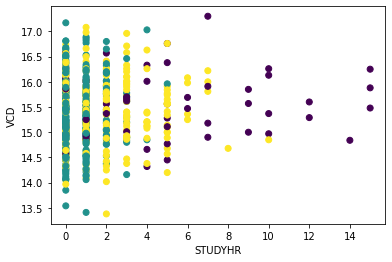

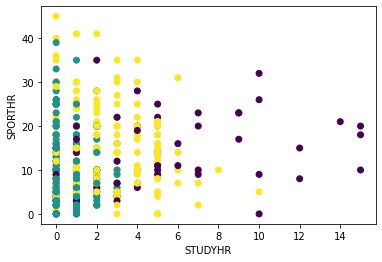

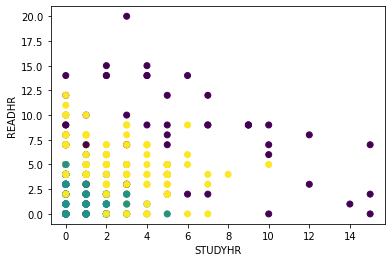

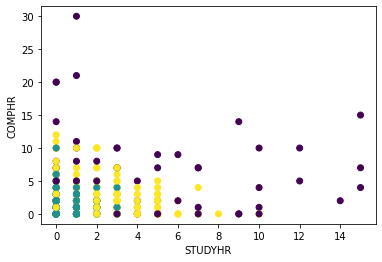

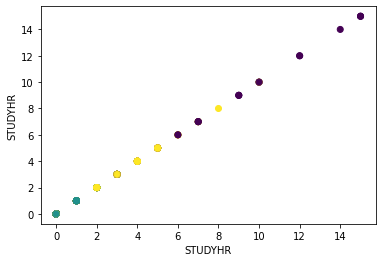

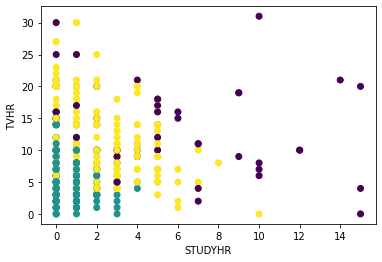

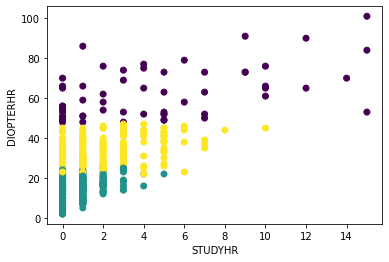

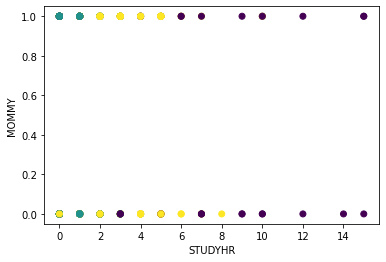

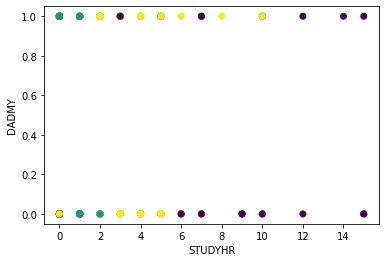

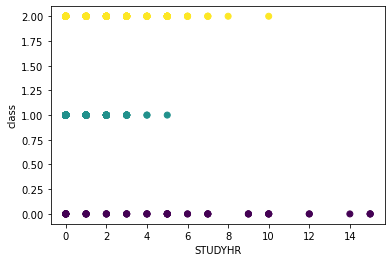

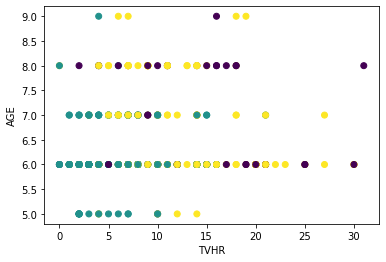

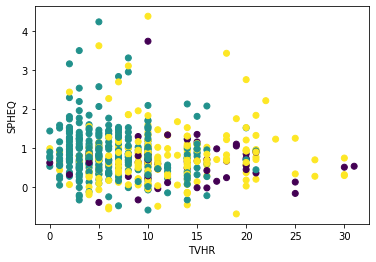

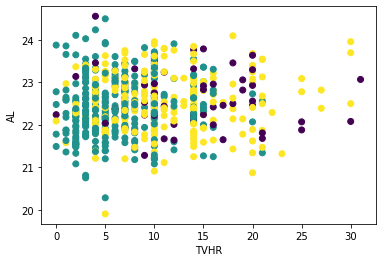

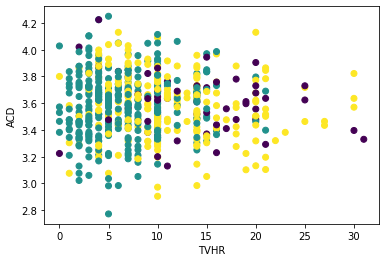

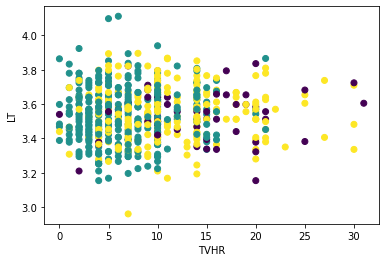

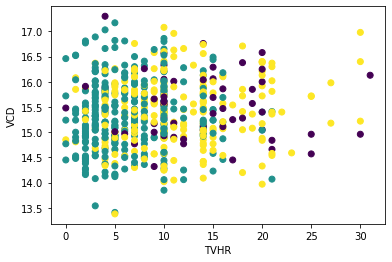

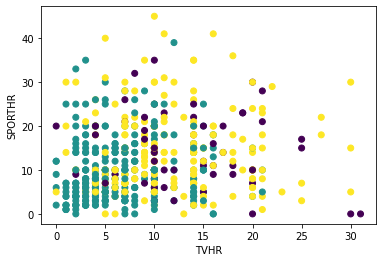

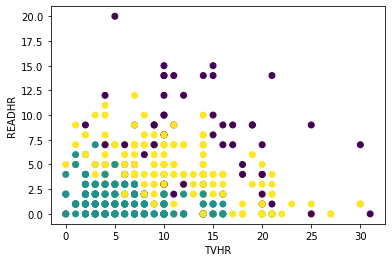

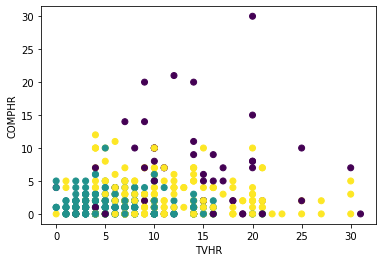

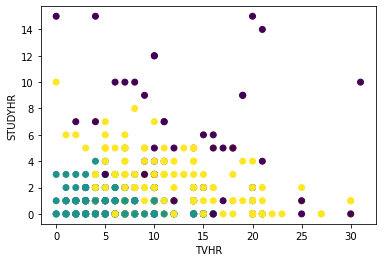

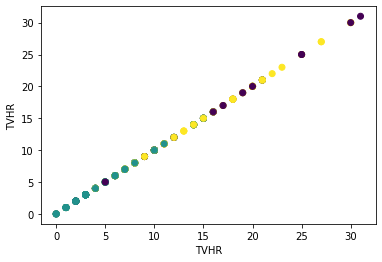

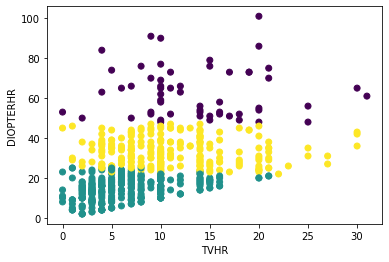

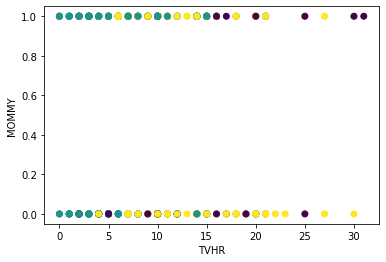

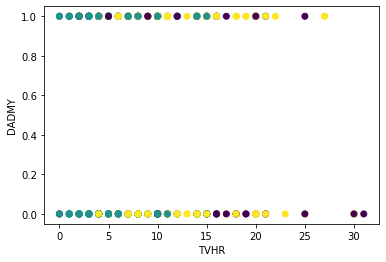

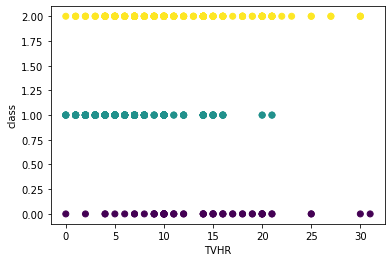

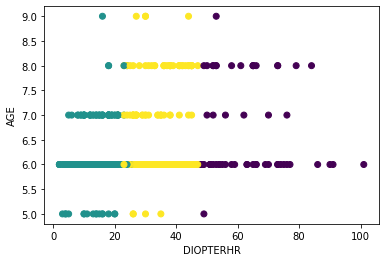

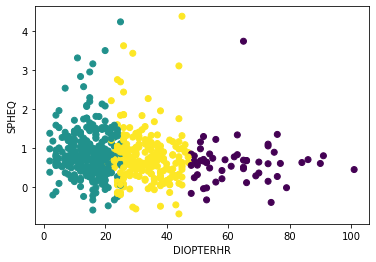

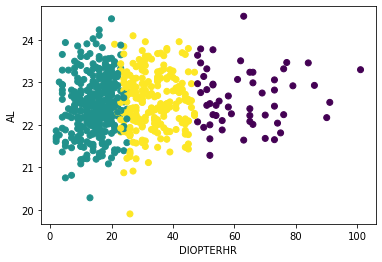

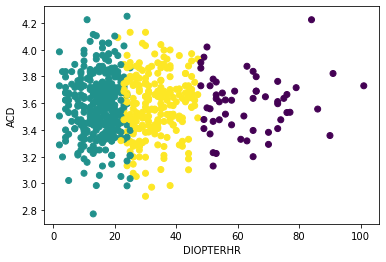

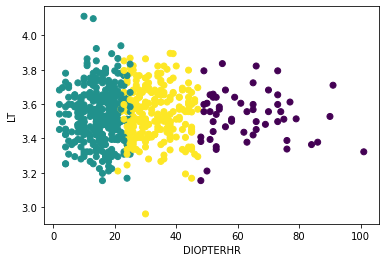

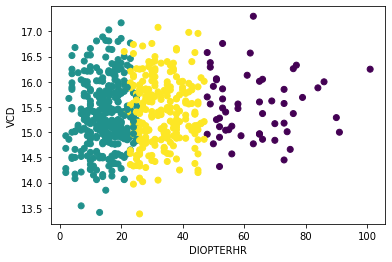

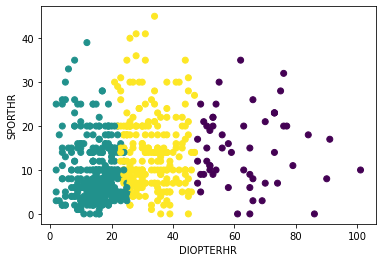

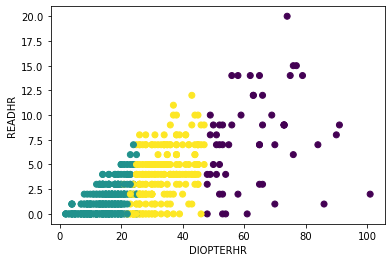

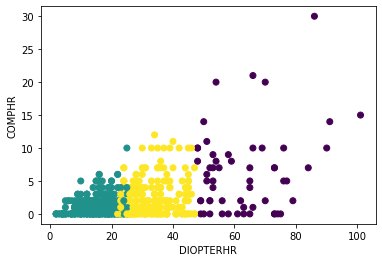

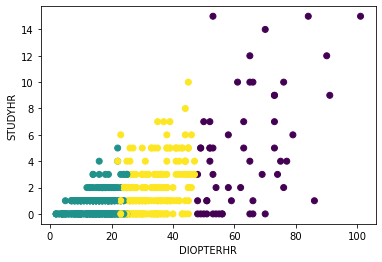

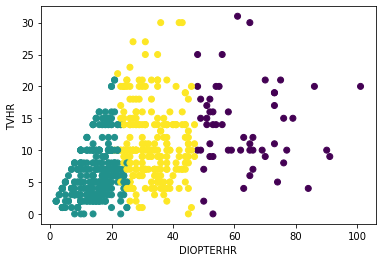

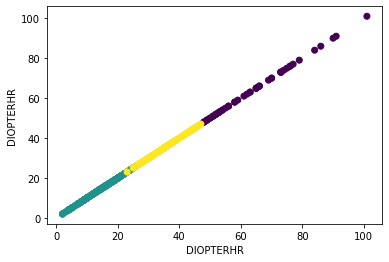

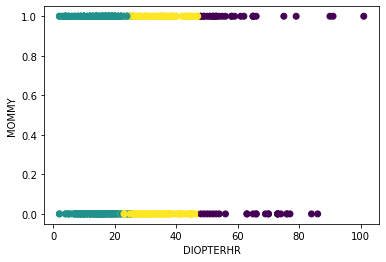

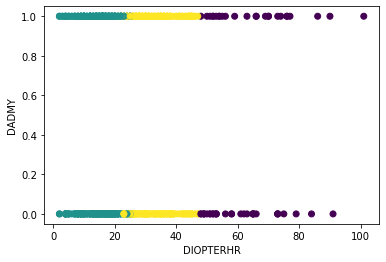

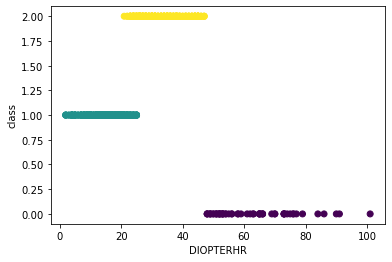

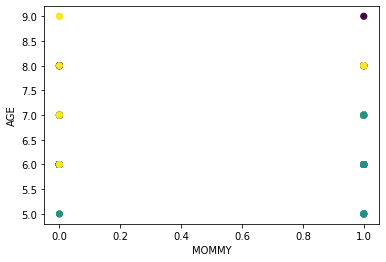

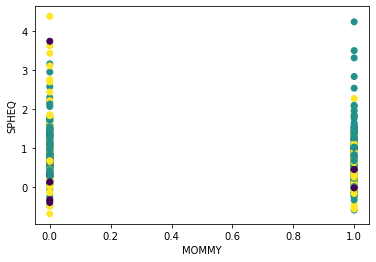

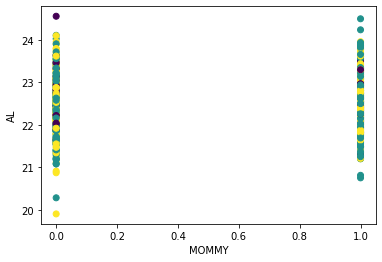

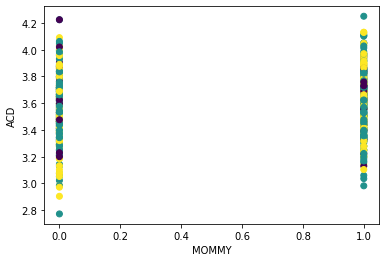

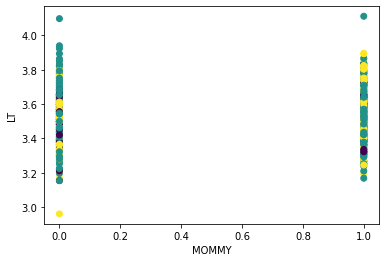

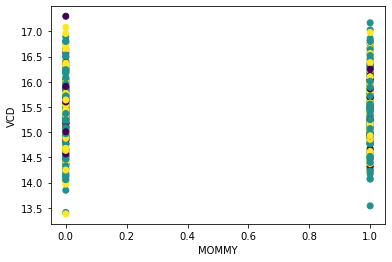

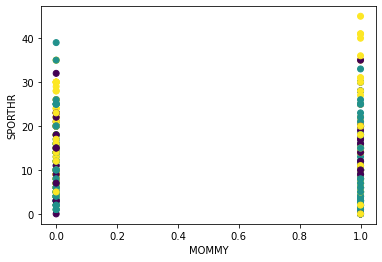

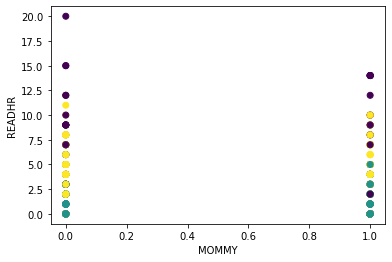

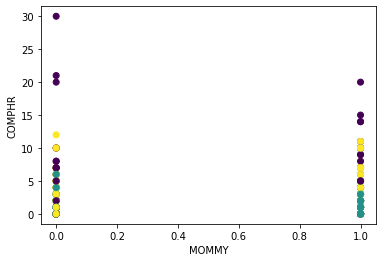

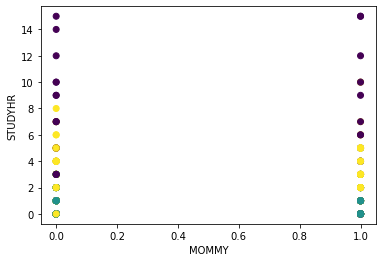

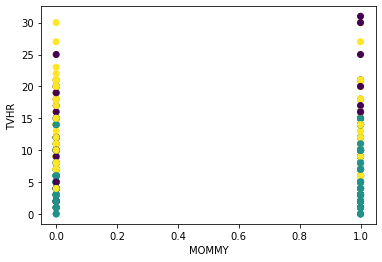

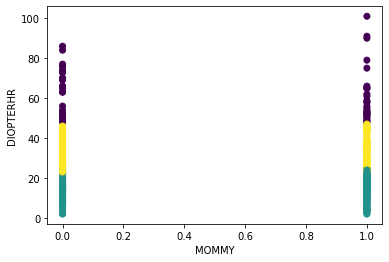

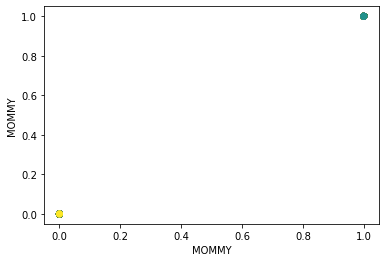

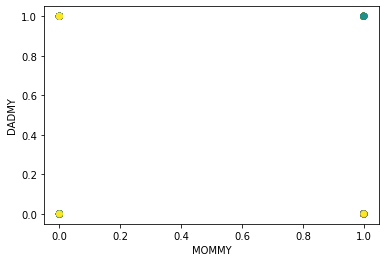

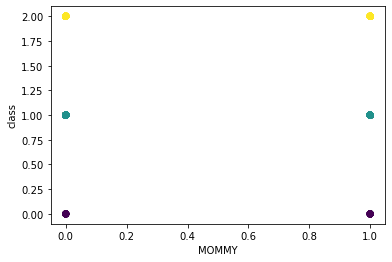

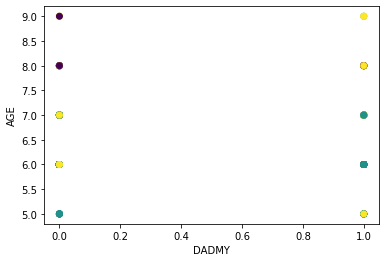

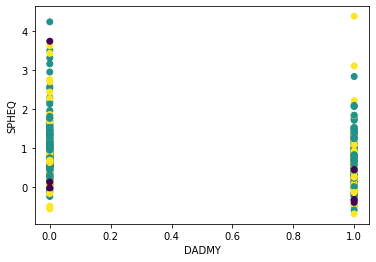

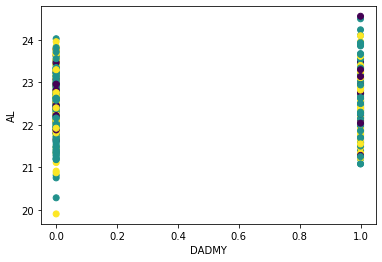

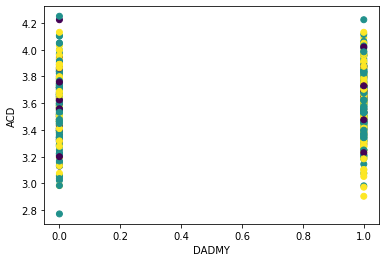

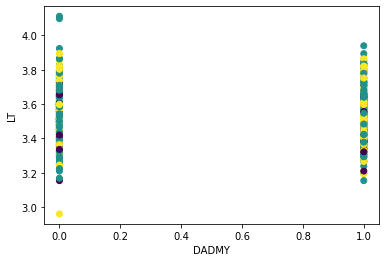

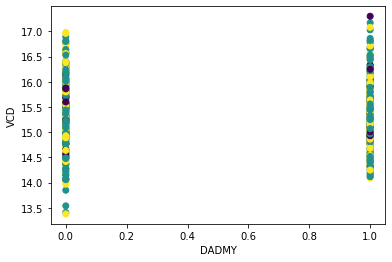

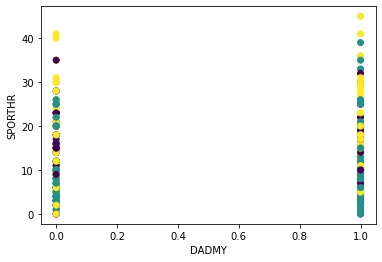

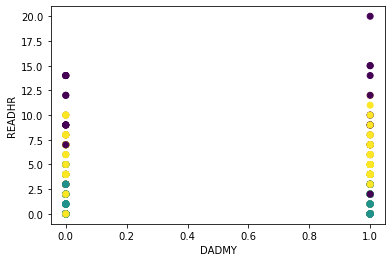

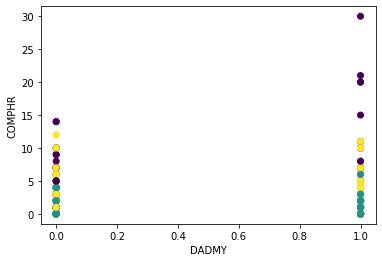

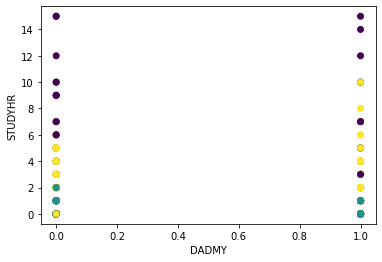

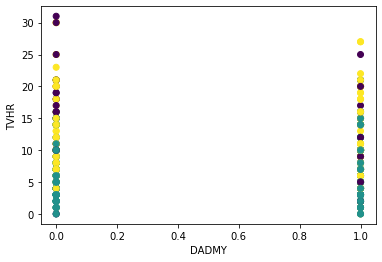

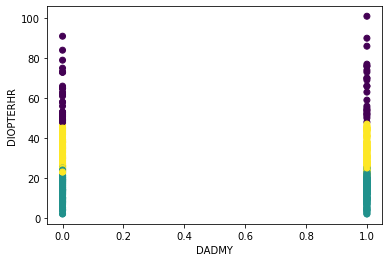

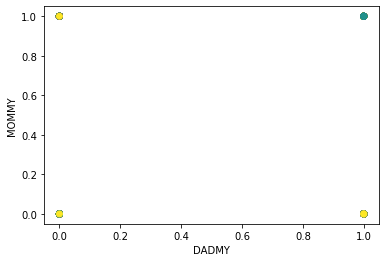

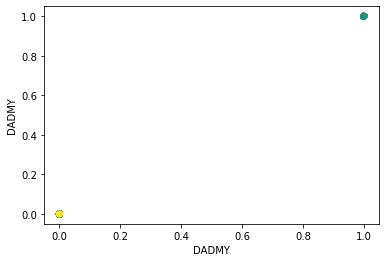

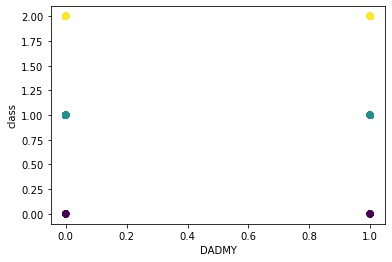

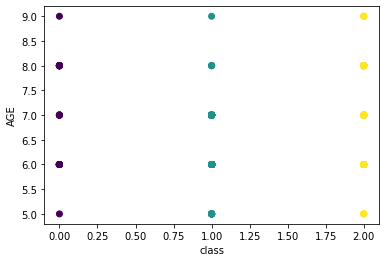

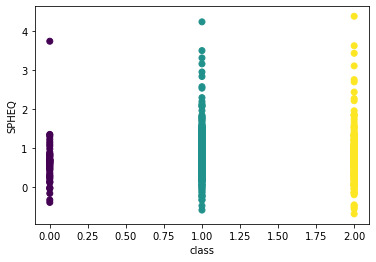

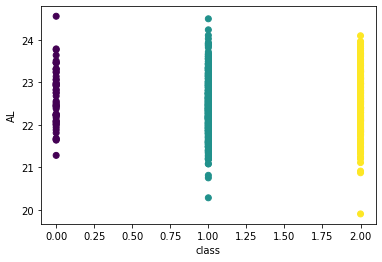

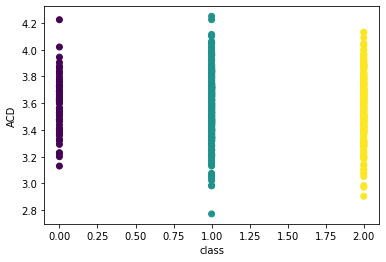

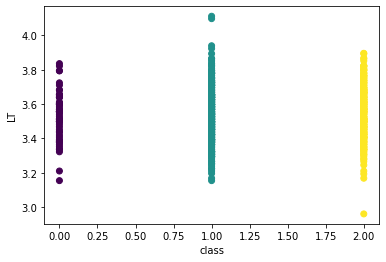

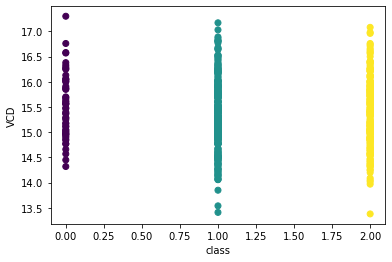

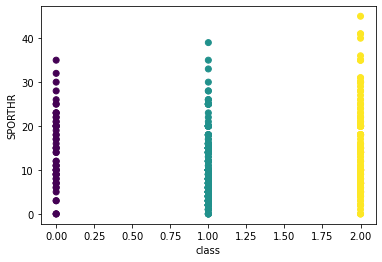

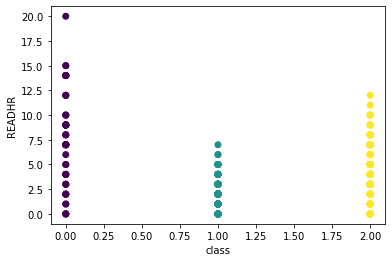

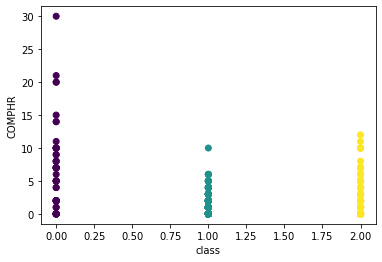

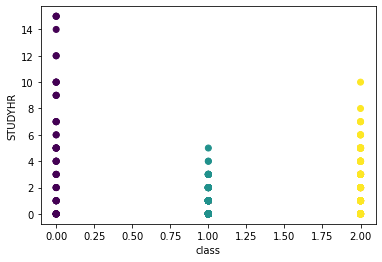

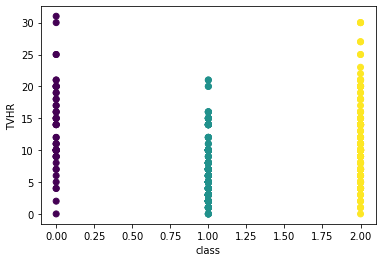

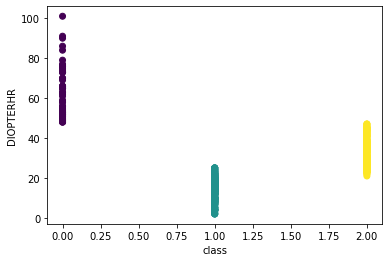

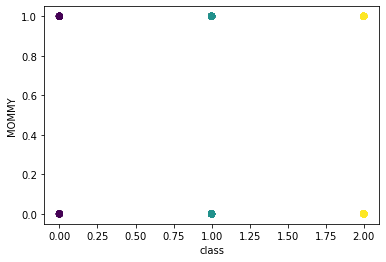

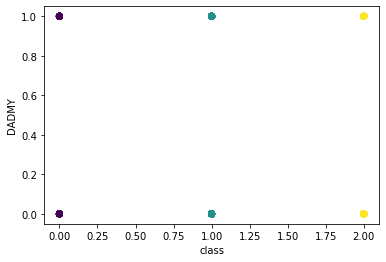

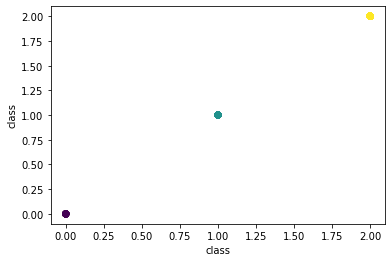

In [27]:
# plotting features with 3 clusters
clusters = get_clusters(3, X)

for i in clusters:
    for j in clusters:
        plt.scatter(clusters[i], clusters[j], c=clusters['class'])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

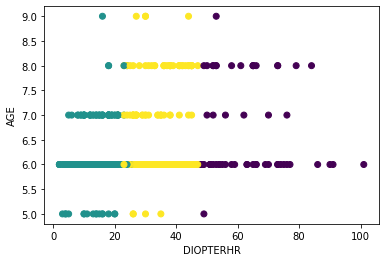

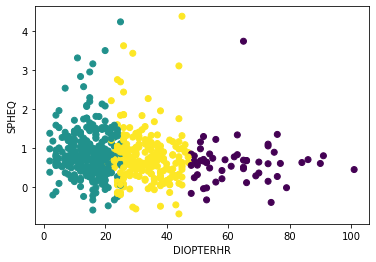

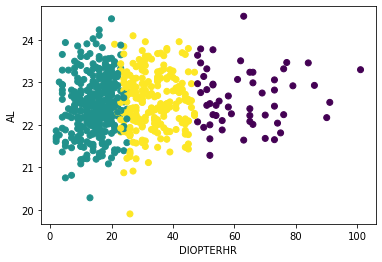

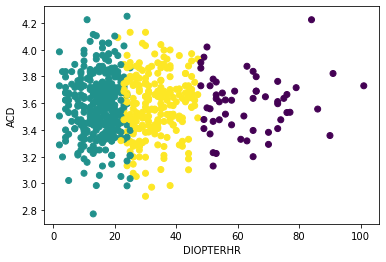

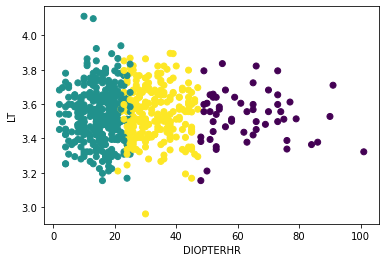

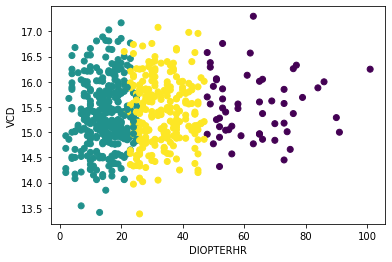

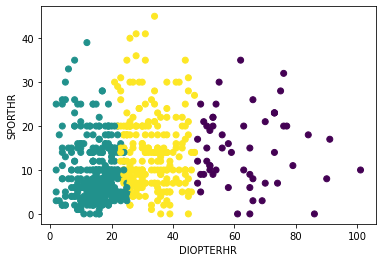

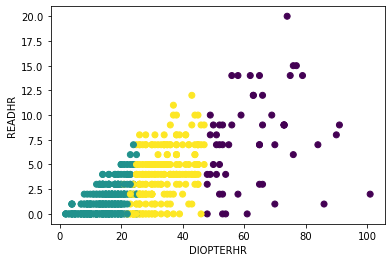

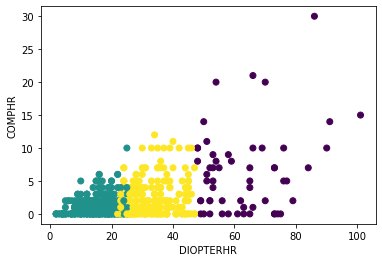

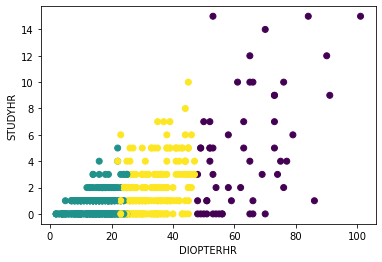

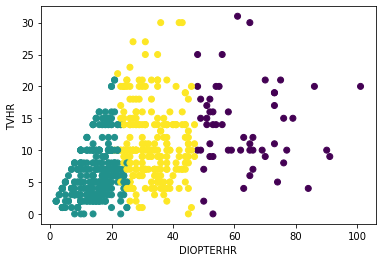

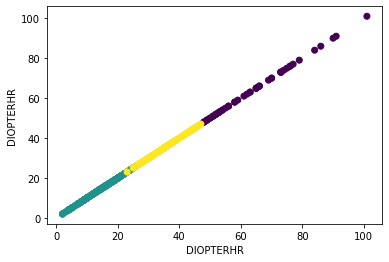

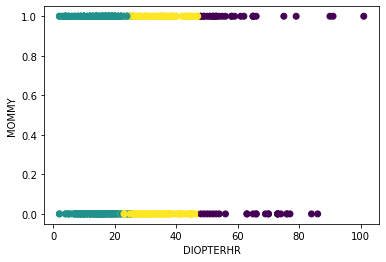

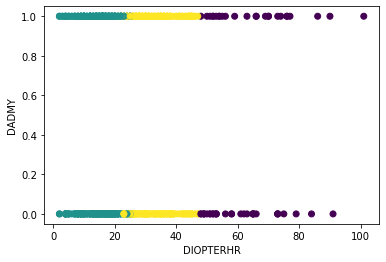

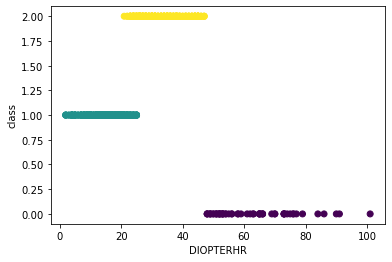

In [30]:
# plotting DIOPTERHR vs other features in dataset

for i in clusters:
    plt.scatter(clusters['DIOPTERHR'], clusters[i], c=clusters['class'])
    plt.xlabel('DIOPTERHR')
    plt.ylabel(i)
    plt.show()

The t-SNE results did not provide conclusive evidence to recommended a number of clusters. As an alternative approach, an elbow curve was generated using KMeans. The elbow curve shows inflection at k = 3. A KMeans analysis was then performed using three clusters. The results show that three clusters can be differentiated in the dataset when plotting features against DIOPTERHR.